In [34]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [35]:
%load_ext autoreload
%autoreload 2
from fastai import *
from fastai.text import * 
from fastai.callbacks import *
import pandas as pd
from tqdm import tnrange, tqdm_notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
# See how many devices are around
print('Devices available: ', torch.cuda.device_count())
# Set it to a particular device
CUDA_DEVICE = 7
print('Set device: ', CUDA_DEVICE)
torch.cuda.set_device(CUDA_DEVICE)
# Check which device you are on
print('Current device: ', torch.cuda.current_device())

Devices available:  8
Set device:  7
Current device:  7


In [37]:
DATA_PATH = '../../data/virtual-operator'
TRAIN_DATASET = os.path.join(DATA_PATH, 'train.csv')
VAL_DATASET = os.path.join(DATA_PATH, 'val.csv')
TEST_DATASET  = os.path.join(DATA_PATH, 'test.csv')

In [38]:
LM_PATH=Path('../../models/ulmfit/lm/tweets-pt-pmann/')
#LM_PATH.mkdir(exist_ok=True)

In [39]:
def read_data(filename):
    data = pd.read_csv(filename, sep=";", names =['utterance','label'], header=None, dtype={'utterance':str, 'label': str} )
    return data

In [40]:
train_dataset = read_data(TRAIN_DATASET).dropna()
val_dataset = read_data(VAL_DATASET).dropna()
test_dataset = read_data(TEST_DATASET).dropna()

In [41]:
tokenizer = Tokenizer(lang='pt', n_cpus=10)

In [42]:
data_lm = TextLMDataBunch.from_df(LM_PATH, train_df = train_dataset, valid_df = val_dataset,  bs=128, text_cols=0)

/usr/local/lib/python3.6/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [43]:
data_lm.save('data_lm_virtual_operator')

In [44]:
data_lm = load_data(LM_PATH, 'data_lm_virtual_operator', bs=128)

In [45]:
weights_pretrained = 'tweets-pt-30k-pmann-reduced-lm-step2-best'
itos_pretrained = 'tweets_pt_lm_pmann_reduced_30k_itos_vocab'
pretained_data = (weights_pretrained, itos_pretrained)

In [62]:
learn = language_model_learner(data_lm, AWD_LSTM, pretrained_fnames=pretained_data, drop_mult=0, callback_fns=ShowGraph)
learn.freeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.00E-01
Min loss divided by 10: 1.32E-01


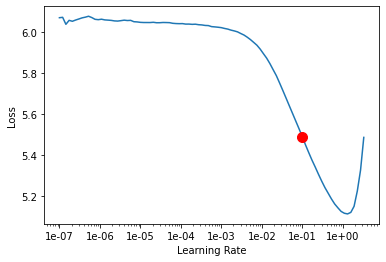

In [47]:
learn.lr_find()
learn.recorder.plot(suggestion=True, skip_start=0)

epoch,train_loss,valid_loss,accuracy,time
0,3.139972,3.085280,0.370581,01:23
1,3.018304,3.008790,0.377440,01:23
2,2.941831,2.975663,0.381832,01:32
3,2.870063,2.949810,0.384869,01:34
4,2.817710,2.943212,0.385916,01:34


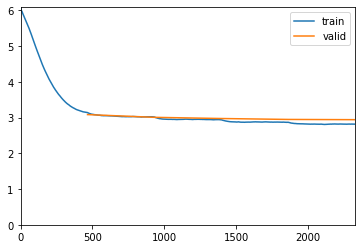

Better model found at epoch 0 with valid_loss value: 3.085280418395996.
Better model found at epoch 1 with valid_loss value: 3.008789539337158.
Better model found at epoch 2 with valid_loss value: 2.975663185119629.
Better model found at epoch 3 with valid_loss value: 2.949810266494751.
Better model found at epoch 4 with valid_loss value: 2.943211555480957.


In [48]:
learn.fit_one_cycle(5, 2e-2, moms=(0.8,0.7),callbacks=[ShowGraph(learn), SaveModelCallback(learn, name='tweets-pt-25k-FT-virtual-operator-head-best')])

In [49]:
learn.purge()
learn.load('tweets-pt-25k-FT-virtual-operator-head-best') 

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (482348 items)
x: LMTextList
xxbos para visita técnica,xxbos instalaçao,xxbos essa minha parabólica tá pegando só um canal os outros com controle remoto nao tá pegando,xxbos falta ausencia de sinal em algum canal do canal 94,xxbos é o aparelho zapper nao tá funcionando
y: LMLabelList
,,,,
Path: ../../models/ulmfit/lm/tweets-pt-pmann;

Valid: LabelList (53595 items)
x: LMTextList
xxbos visita técnica,xxbos falar com atendente,xxbos nao tá funcionando o meu aparelho,xxbos banda larga banda larga,xxbos sinal
y: LMLabelList
,,,,
Path: ../../models/ulmfit/lm/tweets-pt-pmann;

Test: None, model=SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(11376, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(11376, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1152, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1152, 1152, b

epoch,train_loss,valid_loss,accuracy,time
0,2.819139,2.904659,0.390138,02:00
1,2.808465,2.863859,0.396248,01:54
2,2.707531,2.854954,0.399202,01:50
3,2.529909,2.886689,0.397918,01:54
4,2.343079,2.959423,0.393705,01:54


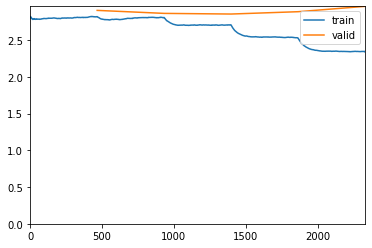

Better model found at epoch 0 with valid_loss value: 2.9046590328216553.
Better model found at epoch 1 with valid_loss value: 2.863858938217163.
Better model found at epoch 2 with valid_loss value: 2.8549535274505615.


In [50]:
learn.unfreeze()
learn.fit_one_cycle(5, 8E-3, moms=(0.8,0.7), callbacks=[ShowGraph(learn), SaveModelCallback(learn, name='tweets-pt-25k-FT-virtual-operator-step2-best')])

In [51]:
np.exp(2.959423)

19.286840037609288

In [63]:
learn.purge()
learn.load('tweets-pt-25k-FT-virtual-operator-step2-best')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (482348 items)
x: LMTextList
xxbos para visita técnica,xxbos instalaçao,xxbos essa minha parabólica tá pegando só um canal os outros com controle remoto nao tá pegando,xxbos falta ausencia de sinal em algum canal do canal 94,xxbos é o aparelho zapper nao tá funcionando
y: LMLabelList
,,,,
Path: ../../models/ulmfit/lm/tweets-pt-pmann;

Valid: LabelList (53595 items)
x: LMTextList
xxbos visita técnica,xxbos falar com atendente,xxbos nao tá funcionando o meu aparelho,xxbos banda larga banda larga,xxbos sinal
y: LMLabelList
,,,,
Path: ../../models/ulmfit/lm/tweets-pt-pmann;

Test: None, model=SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(11376, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(11376, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1152, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1152, 1152, b

In [72]:
learn.save_encoder('tweets-pt30k-FT-virtual-operator-encoder')

In [74]:
!ls ../../models/ulmfit/lm/tweets-pt-pmann/models/

tmp.pth
tweets-pt-25k-FT-virtual-operator-encoder.pth
tweets-pt-25k-FT-virtual-operator-head-best.pth
tweets-pt-25k-FT-virtual-operator-step2-best.pth
tweets-pt-30k-pmann-reduced-lm-head-best.pth
tweets-pt-30k-pmann-reduced-lm-step2-best.pth
tweets-pt30k-FT-virtual-operator-encoder.pth
tweets_pt_lm_pmann_reduced_30k_encoder.pth
tweets_pt_lm_pmann_reduced_30k_export
tweets_pt_lm_pmann_reduced_30k_itos_vocab.pkl


In [75]:
!cp ../../models/ulmfit/lm/tweets-pt-pmann/models/tweets-pt30k-FT-virtual-operator-encoder.pth models/

In [65]:
learn.predict('o meu controle está ', 3)

'o meu controle está  quebrado meu aparelho'

In [66]:
data_class = TextClasDataBunch.from_df(path = "", train_df = train_dataset, valid_df = val_dataset, test_df = test_dataset,  vocab=data_lm.vocab,tokenizer=tokenizer, bs=128, text_cols=['utterance'], label_cols=['label'])

/usr/local/lib/python3.6/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [76]:
learn = text_classifier_learner(data_class, AWD_LSTM, drop_mult=0.1, callback_fns=ShowGraph)
learn.load_encoder('tweets-pt30k-FT-virtual-operator-encoder')
learn.freeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 8.32E-02
Min loss divided by 10: 7.59E-02


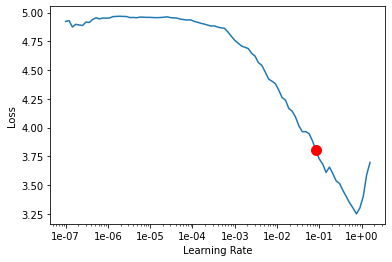

In [77]:
learn.lr_find()
learn.recorder.plot(suggestion=True, skip_start=0)

epoch,train_loss,valid_loss,accuracy,time
0,0.788629,0.682335,0.821644,01:30
1,0.861273,0.678437,0.823976,01:27
2,0.914595,0.760867,0.801008,01:23
3,0.894973,0.770631,0.788469,01:31
4,0.824787,0.673680,0.821495,01:34
5,0.630127,0.683206,0.812856,01:31
6,0.694524,0.602396,0.838810,01:44
7,0.649943,0.546252,0.851068,01:37
8,0.574416,0.506538,0.860883,01:35
9,0.603349,0.498699,0.863066,01:22


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


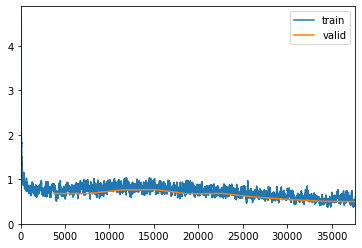

Better model found at epoch 0 with valid_loss value: 0.682335376739502.


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Better model found at epoch 1 with valid_loss value: 0.6784367561340332.


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ar

Better model found at epoch 4 with valid_loss value: 0.6736800670623779.


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ar

Better model found at epoch 6 with valid_loss value: 0.6023964285850525.


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Better model found at epoch 7 with valid_loss value: 0.546252429485321.


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Better model found at epoch 8 with valid_loss value: 0.506538450717926.


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Better model found at epoch 9 with valid_loss value: 0.49869945645332336.


In [78]:
learn.fit_one_cycle(10, 5E-2, moms=(0.8,0.7), callbacks=[ShowGraph(learn), SaveModelCallback(learn, name='tweets-pt-30k-FT-virtual-operator-classifier-head-best')])

In [79]:
learn.load('tweets-pt-30k-FT-virtual-operator-classifier-head-best')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (482348 items)
x: TextList
xxbos para visita técnica,xxbos instalaçao,xxbos essa minha parabólica tá pegando só um canal os outros com controle remoto nao tá pegando,xxbos falta ausencia de sinal em algum canal do canal 94,xxbos é o aparelho zapper nao tá funcionando
y: CategoryList
Sintomas.Genérico.Sky não funciona,Sintomas.Genérico.Instalação,Sintomas.Genérico.Canal não pega,Sintomas.Genérico.Canal não pega,Sintomas.Genérico.Equipamento não funciona G
Path: .;

Valid: LabelList (53595 items)
x: TextList
xxbos visita técnica,xxbos falar com atendente,xxbos nao tá funcionando o meu aparelho,xxbos banda larga banda larga,xxbos sinal
y: CategoryList
Sintomas.Genérico.Problema com visita técnica,Sintomas.Genérico.Falar com atendente,Sintomas.Genérico.Texto ou código na tela,Sintomas.Qualificado.Banda larga,Sintomas.Genérico.Sem sinal
Path: .;

Test: LabelList (133986 items)
x: TextList
xxbos equipamento,xxbos é que eu tô sem sinal no m

epoch,train_loss,valid_loss,accuracy,time
0,0.656121,1.002159,0.848885,01:46
1,0.345323,1.107817,0.925758,01:44


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


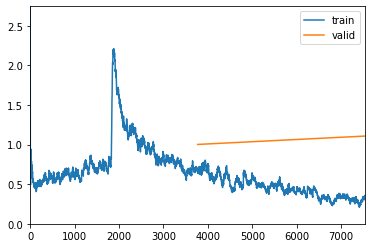

Better model found at epoch 0 with valid_loss value: 1.0021586418151855.


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [80]:
learn.freeze_to(-2)
learn.fit_one_cycle(2, slice(1e-1/(2.6**4),1e-1), moms=(0.8,0.7), callbacks=[ShowGraph(learn), SaveModelCallback(learn, name='tweets-pt-30k-FT-virtual-operator-classifier-step2')])


In [81]:
learn.load('tweets-pt-30k-FT-virtual-operator-classifier-step2')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (482348 items)
x: TextList
xxbos para visita técnica,xxbos instalaçao,xxbos essa minha parabólica tá pegando só um canal os outros com controle remoto nao tá pegando,xxbos falta ausencia de sinal em algum canal do canal 94,xxbos é o aparelho zapper nao tá funcionando
y: CategoryList
Sintomas.Genérico.Sky não funciona,Sintomas.Genérico.Instalação,Sintomas.Genérico.Canal não pega,Sintomas.Genérico.Canal não pega,Sintomas.Genérico.Equipamento não funciona G
Path: .;

Valid: LabelList (53595 items)
x: TextList
xxbos visita técnica,xxbos falar com atendente,xxbos nao tá funcionando o meu aparelho,xxbos banda larga banda larga,xxbos sinal
y: CategoryList
Sintomas.Genérico.Problema com visita técnica,Sintomas.Genérico.Falar com atendente,Sintomas.Genérico.Texto ou código na tela,Sintomas.Qualificado.Banda larga,Sintomas.Genérico.Sem sinal
Path: .;

Test: LabelList (133986 items)
x: TextList
xxbos equipamento,xxbos é que eu tô sem sinal no m

epoch,train_loss,valid_loss,accuracy,time
0,0.456938,22.053902,0.894897,02:33
1,0.372386,0.747461,0.924340,02:18
2,0.218420,0.627413,0.952384,02:12
3,0.121068,0.176668,0.962646,02:13


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


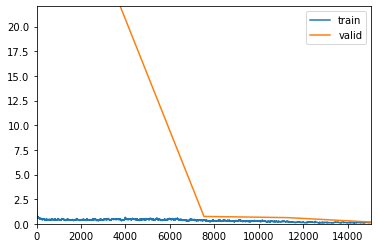

Better model found at epoch 0 with valid_loss value: 22.05390167236328.


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Better model found at epoch 1 with valid_loss value: 0.7474610805511475.


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Better model found at epoch 2 with valid_loss value: 0.6274127960205078.


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Better model found at epoch 3 with valid_loss value: 0.17666774988174438.


In [82]:
learn.freeze_to(-3)
learn.fit_one_cycle(4, slice(5e-2/(2.6**4),5e-2), moms=(0.8,0.7), callbacks=[ShowGraph(learn), SaveModelCallback(learn, name='tweets-pt-30k-FT-virtual-operator-classifier-step3')])


In [83]:
learn.purge()

RNNLearner(data=TextClasDataBunch;

Train: LabelList (482348 items)
x: TextList
xxbos para visita técnica,xxbos instalaçao,xxbos essa minha parabólica tá pegando só um canal os outros com controle remoto nao tá pegando,xxbos falta ausencia de sinal em algum canal do canal 94,xxbos é o aparelho zapper nao tá funcionando
y: CategoryList
Sintomas.Genérico.Sky não funciona,Sintomas.Genérico.Instalação,Sintomas.Genérico.Canal não pega,Sintomas.Genérico.Canal não pega,Sintomas.Genérico.Equipamento não funciona G
Path: .;

Valid: LabelList (53595 items)
x: TextList
xxbos visita técnica,xxbos falar com atendente,xxbos nao tá funcionando o meu aparelho,xxbos banda larga banda larga,xxbos sinal
y: CategoryList
Sintomas.Genérico.Problema com visita técnica,Sintomas.Genérico.Falar com atendente,Sintomas.Genérico.Texto ou código na tela,Sintomas.Qualificado.Banda larga,Sintomas.Genérico.Sem sinal
Path: .;

Test: LabelList (133986 items)
x: TextList
xxbos equipamento,xxbos é que eu tô sem sinal no m

In [84]:
learn.load('tweets-pt-30k-FT-virtual-operator-classifier-step3')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (482348 items)
x: TextList
xxbos para visita técnica,xxbos instalaçao,xxbos essa minha parabólica tá pegando só um canal os outros com controle remoto nao tá pegando,xxbos falta ausencia de sinal em algum canal do canal 94,xxbos é o aparelho zapper nao tá funcionando
y: CategoryList
Sintomas.Genérico.Sky não funciona,Sintomas.Genérico.Instalação,Sintomas.Genérico.Canal não pega,Sintomas.Genérico.Canal não pega,Sintomas.Genérico.Equipamento não funciona G
Path: .;

Valid: LabelList (53595 items)
x: TextList
xxbos visita técnica,xxbos falar com atendente,xxbos nao tá funcionando o meu aparelho,xxbos banda larga banda larga,xxbos sinal
y: CategoryList
Sintomas.Genérico.Problema com visita técnica,Sintomas.Genérico.Falar com atendente,Sintomas.Genérico.Texto ou código na tela,Sintomas.Qualificado.Banda larga,Sintomas.Genérico.Sem sinal
Path: .;

Test: LabelList (133986 items)
x: TextList
xxbos equipamento,xxbos é que eu tô sem sinal no m

epoch,train_loss,valid_loss,accuracy,time
0,0.088481,0.179402,0.962851,02:59
1,0.069721,3.270021,0.960836,03:10
2,0.071974,0.221303,0.963523,02:50
3,0.092529,0.156814,0.964250,03:03


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


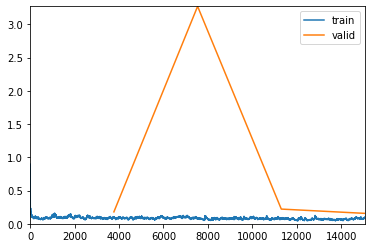

Better model found at epoch 0 with valid_loss value: 0.17940224707126617.


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ar

Better model found at epoch 3 with valid_loss value: 0.15681441128253937.


In [85]:
learn.unfreeze()
learn.fit_one_cycle(4, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7), callbacks=[ShowGraph(learn), SaveModelCallback(learn, name='tweets-pt-30k-FT-virtual-operator-classifier-step4')])

In [86]:
learn.load('tweets-pt-30k-FT-virtual-operator-classifier-step4')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (482348 items)
x: TextList
xxbos para visita técnica,xxbos instalaçao,xxbos essa minha parabólica tá pegando só um canal os outros com controle remoto nao tá pegando,xxbos falta ausencia de sinal em algum canal do canal 94,xxbos é o aparelho zapper nao tá funcionando
y: CategoryList
Sintomas.Genérico.Sky não funciona,Sintomas.Genérico.Instalação,Sintomas.Genérico.Canal não pega,Sintomas.Genérico.Canal não pega,Sintomas.Genérico.Equipamento não funciona G
Path: .;

Valid: LabelList (53595 items)
x: TextList
xxbos visita técnica,xxbos falar com atendente,xxbos nao tá funcionando o meu aparelho,xxbos banda larga banda larga,xxbos sinal
y: CategoryList
Sintomas.Genérico.Problema com visita técnica,Sintomas.Genérico.Falar com atendente,Sintomas.Genérico.Texto ou código na tela,Sintomas.Qualificado.Banda larga,Sintomas.Genérico.Sem sinal
Path: .;

Test: LabelList (133986 items)
x: TextList
xxbos equipamento,xxbos é que eu tô sem sinal no m

In [87]:
y = []
for item in test_dataset.itertuples():
    label = item[2]
    label_id = learn.data.classes.index(label)
    y.append(label_id)

In [88]:
preds_test = learn.get_preds(ds_type = DatasetType.Test, ordered=True)

In [89]:
y_hat = torch.argmax(preds_test[0], dim=1)

In [91]:
from sklearn.metrics import classification_report
print(classification_report(y, y_hat, target_names=learn.data.classes, digits=3))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                  precision    recall  f1-score   support

                     Sintomas.Genérico.Atualização de endereço G      0.950     1.000     0.974        76
                          Sintomas.Genérico.Canal Globo não pega      0.744     0.803     0.772       304
                           Sintomas.Genérico.Canal HD não pega G      0.927     0.945     0.936       697
                     Sintomas.Genérico.Canal adulto não pega (G)      0.694     0.735     0.714        34
                      Sintomas.Genérico.Canal comum não pega (G)      0.889     0.871     0.880      1200
                                Sintomas.Genérico.Canal não pega      0.953     0.959     0.956      5967
                       Sintomas.Genérico.Canal opcional não pega      0.848     0.829     0.838       222
                                 Sintomas.Genérico.Canal travado      0.866     0.945     0.904       477
                                    Sintomas.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
test_dataset.head()

,utterance,label
0,equipamento,Sintomas.Genérico.Problema com equipamento
1,é que eu tô sem sinal no meu no meu segundo po...,Sintomas.Qualificado.NãoTéc ponto adicional
2,aparelho com problema,Sintomas.Genérico.Equipamento quebrado G
3,equipamento danificado,Sintomas.Genérico.Equipamento quebrado G
4,quero falar com atendente,Sintomas.Genérico.Falar com atendente


In [16]:
classes = {}

for index, row in test_dataset.iterrows():
    try:
        symptom_label = row['label']
        utterance = row['utterance']
        utt_arr = utterance.split()
        utt_count = len(utt_arr)
        if symptom_label not in classes:
            classes[symptom_label] = {'tokens': utt_count, 'utterances': 1, 'avg': utt_count }
        else:
            classes[symptom_label]['tokens'] += utt_count
            classes[symptom_label]['utterances'] += 1
            classes[symptom_label]['avg'] = classes[symptom_label]['tokens']/classes[symptom_label]['utterances']

    except:
        print(json_line)

for c in classes:
    print(c + ';' + str(classes[c]['avg']))
    
    
    
    

Sintomas.Genérico.Problema com equipamento;2.700466562986003
Sintomas.Qualificado.NãoTéc ponto adicional;12.348462664714495
Sintomas.Genérico.Equipamento quebrado G;5.0631505898681475
Sintomas.Genérico.Falar com atendente;6.140764947954491
Sintomas.Qualificado.Ausência de sinal;6.539279385705847
Sintomas.Genérico.Canal não pega;9.367353779118485
Sintomas.Genérico.Sem sinal;5.69564321055525
Sintomas.Genérico.Mudança de endereço G;3.788484606157537
Sintomas.Qualificado.Cancelamento;9.429886302111532
Sintomas.Qualificado.Banda larga;8.706177606177606
Sintomas.Genérico.Equipamento queimado G;5.076923076923077
Sintomas.Qualificado.Sky Online;7.43613707165109
Sintomas.Qualificado.Canal PPV não está disponível;12.21259842519685
Sintomas.Genérico.Texto ou código na tela;9.043093270365997
Sintomas.Genérico.Problema com canal;2.961093882153933
Sintomas.Qualificado.Travado no canal do cliente;19.152173913043477
Sintomas.Genérico.Problema com imagem;4.102952308856927
Sintomas.Qualificado.NãoTéc_pl

In [ ]:
outF = open("classes_tokens", "w")
for line in textList:
  # write line to output file
  outF.write(line)
  outF.write("\n")
outF.close()